In [1]:
import pandas as pd
import numpy as np

df_new=pd.read_csv("Ecommerce - UK Retailer.csv",encoding=('ISO-8859-1'),low_memory=False)
df_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [2]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [ ]:
df_new.head()

In [4]:
#5. Add the columns - Month, Day and Hour for the invoice 

df_new['InvoiceDate'] = df_new['InvoiceDate'].astype('datetime64[ns]')
df_new['Year'] = df_new.InvoiceDate.dt.year
df_new['Month'] = df_new.InvoiceDate.dt.month
df_new['year_month']=df_new.InvoiceDate.map(lambda x: 100*x.year + x.month)
df_new['Day']=(df_new.InvoiceDate.dt.dayofweek)+1 # +1 to make Monday=1.....until Sunday=7
df_new['Hour'] = df_new.InvoiceDate.dt.hour
df_new['Revenue'] = df_new['Quantity'] * df_new['UnitPrice']
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,year_month,Day,Hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,201012,3,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,201012,3,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34


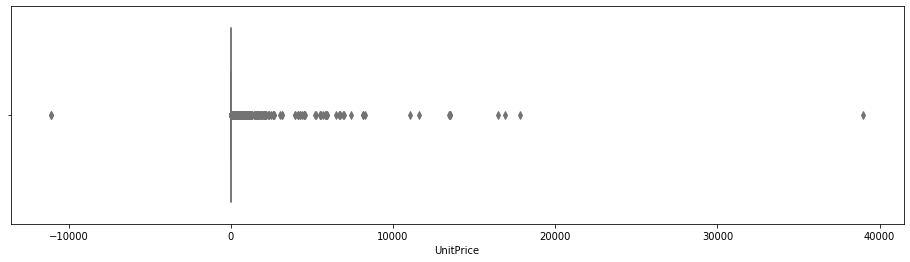

In [5]:
#a. Boxplot - Numeric Variables 

plt.figure(figsize=(16,4))
sns.boxplot(x='UnitPrice', data=df_new, palette ='rainbow');

In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 14 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
Year           541909 non-null int64
Month          541909 non-null int64
year_month     541909 non-null int64
Day            541909 non-null int64
Hour           541909 non-null int64
Revenue        541909 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(6), object(4)
memory usage: 57.9+ MB


C:\Users\Anmol\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Revenue USD($)')

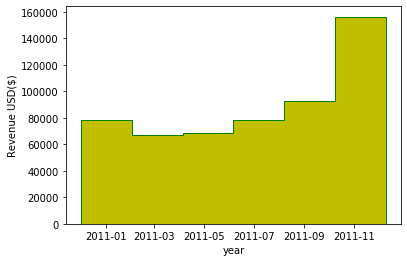

In [7]:
#b. Histogram –  Numeric Variables 

plt.hist(df_new['InvoiceDate'],bins=6,histtype='stepfilled',color='y',edgecolor='g')
plt.xlabel('year')
plt.ylabel('Revenue USD($)')


Text(0.5, 1.0, 'Price Distribution')

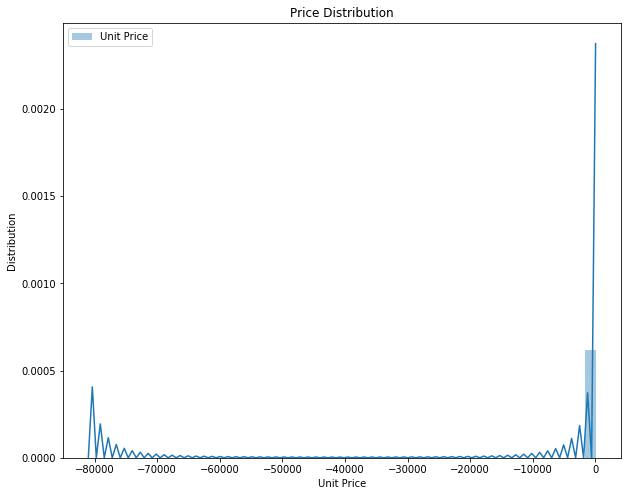

In [8]:
#c. Distribution Plot – Numeric Variables 

plt.subplots(figsize=(10,8))
sns.distplot(df_new.Quantity[df_new.Quantity < 50], label='Unit Price').legend()

plt.xlabel('Unit Price')
plt.ylabel('Distribution')
plt.title('Price Distribution')


(-1, 13)

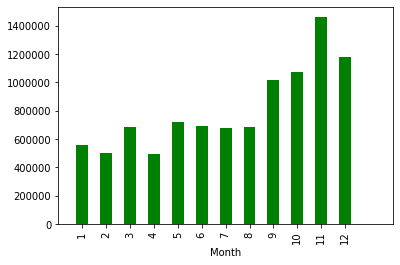

In [9]:
#d. Aggregation for numerical Columns 

df_new.groupby(['Month'])['Revenue'].sum().plot.bar(color="g")
plt.xlim(-1,13)


In [10]:
#e. Unique Values across columns 

pd.unique(df_new[['Country']].values.ravel())

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [11]:
#e. Unique Values across all columns 

pd.unique(df_new[['Country','Description','StockCode','Country']].values.ravel())

array(['United Kingdom', 'WHITE HANGING HEART T-LIGHT HOLDER', '85123A',
       ..., 'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE', '23843'], dtype=object)

In [12]:
#f. Duplicate values across all columns 

duplicateRowsDF = df_new[df_new.duplicated(keep=False)]
duplicateRowsDF 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,year_month,Day,Hour,Revenue
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,2010,12,201012,3,11,4.95
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,2010,12,201012,3,11,2.10
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,2010,12,201012,3,11,1.25
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,2010,12,201012,3,11,1.25
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom,2010,12,201012,3,11,2.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom,2011,12,201112,5,11,0.39
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom,2011,12,201112,5,11,2.49
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom,2011,12,201112,5,11,1.95
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom,2011,12,201112,5,11,2.10


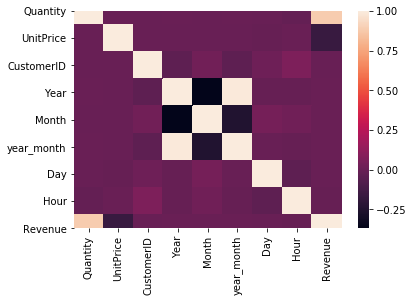

In [13]:
#g. Correlation – Heatmap - All Numeric Variables 
 
sns.heatmap(df_new.corr())

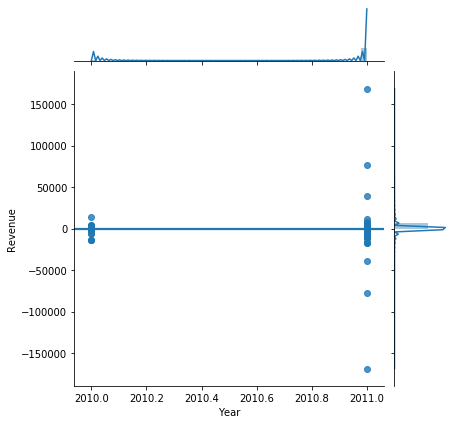

In [14]:
#h. Regression Plot -  Numeric Variables 

sns.jointplot(x='Year',y='Revenue',data=df_new,kind='reg')

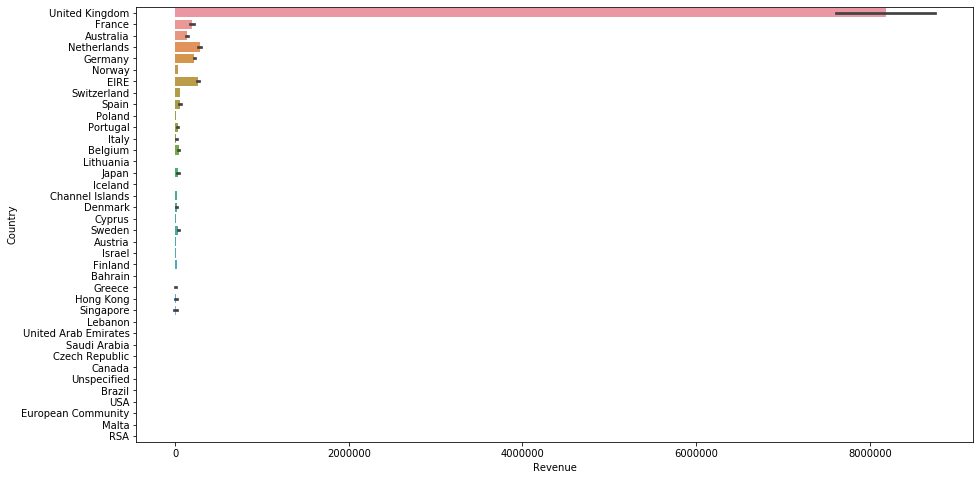

In [15]:
#i. Bar Plot – Categorical Variable vs  Numerical Variable 
#15. How much money spent by each country? 

plt.subplots(figsize=(15,8))
sns.barplot(x='Revenue',y='Country',data=df_new,estimator=np.sum)

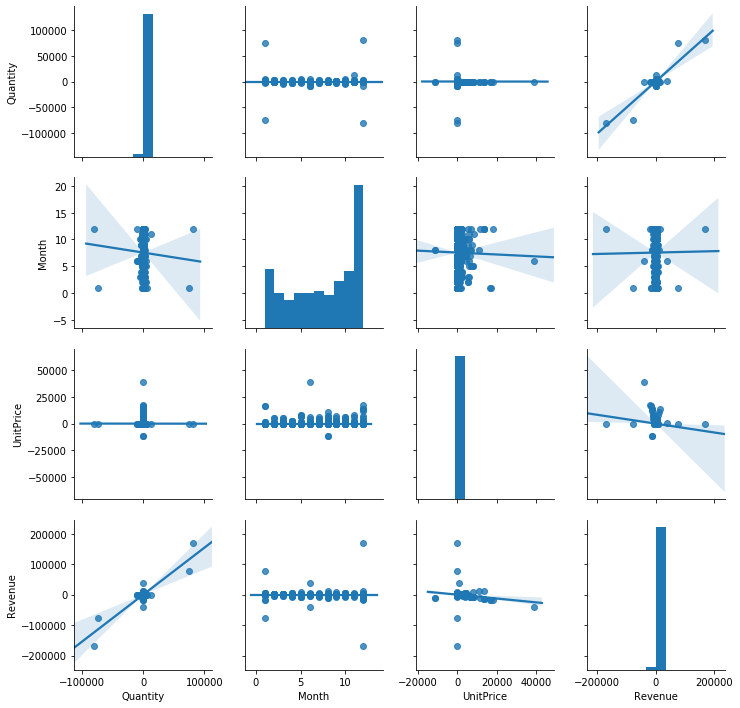

In [63]:
#j. Pair plot - All Numeric Variables 

sns.pairplot(df_new, vars=['Quantity', 'Month', 'UnitPrice','Revenue'], kind='reg')


Text(0, 0.5, 'Revenue')

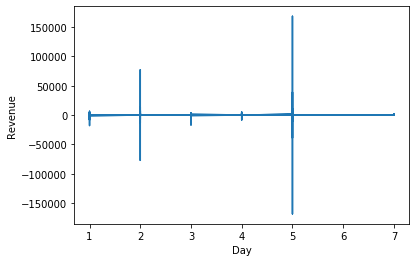

In [17]:
#k. Line chart to show the trend of data - All Numeric/Date Variables
plt.plot(df_new['Day'],df_new['Revenue'])
plt.xlabel('Day')
plt.ylabel('Revenue')

In [18]:
#l. Plot the skewness - All Numeric Variables 
df_new.skew(axis=0,skipna=True)

Quantity       -0.264076
UnitPrice     186.506972
CustomerID      0.029835
Year           -3.137135
Month          -0.414813
year_month     -3.049078
Day             0.467195
Hour            0.005545
Revenue        -0.964389
dtype: float64

In [19]:
#l. Plot the skewness - All Numeric Variables 

df_new.skew(axis=1,skipna=True)

0         2.957284
1         2.957288
2         2.957290
3         2.957288
4         2.957288
            ...   
541904    2.978223
541905    2.978222
541906    2.978224
541907    2.978224
541908    2.978223
Length: 541909, dtype: float64

In [20]:
#2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode) 
df_new.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Year                0
Month               0
year_month          0
Day                 0
Hour                0
Revenue             0
dtype: int64

In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 14 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
Year           541909 non-null int64
Month          541909 non-null int64
year_month     541909 non-null int64
Day            541909 non-null int64
Hour           541909 non-null int64
Revenue        541909 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(6), object(4)
memory usage: 57.9+ MB


In [22]:
pd.isnull(df_new['Description']).sum()

1454

In [23]:
df_new['Description'].fillna(df_new['Description'].mode()[0],inplace=True)

In [24]:
pd.isnull(df_new['Description']).sum()

0

In [25]:
pd.isnull(df_new['CustomerID']).sum()

135080

In [79]:
df_new['CustomerID'].fillna(df_new['CustomerID'].mean(),axis=0,inplace=True)

In [80]:
pd.isnull(df_new['CustomerID']).sum()

0

In [65]:
#4. Remove rows which have negative values in Quantity column 

df_new[(df_new['Quantity'] >= 0)].sum()


In [61]:
#3. Remove duplicate rows 

df_new.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,year_month,Day,Hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,201012,3,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,201012,3,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,201112,5,12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,201112,5,12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,201112,5,12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,201112,5,12,16.60


In [29]:
#6. How many orders made by the customers? 

index = pd.Index(df_new['Quantity'])
print(f"Total orders made by the customers = {index.value_counts().sum()}")

Total orders made by the customers = 541909


In [30]:
#6. How many orders made by the customers? 

pd.Index(df_new['Quantity']).value_counts().sum()

541909

In [31]:
#7. TOP 5 customers with higher number of orders 

df=df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head(10)
df
df.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
1,12347.0,Iceland,182
5,12352.0,Norway,95
3,12349.0,Italy,73
9,12356.0,Portugal,59
7,12354.0,Spain,58


In [81]:
# 8. How much money spent by the customers? 

money_spent = df_new.groupby(by=['CustomerID','Country'], as_index=False)['Revenue'].sum()
print(money_spent)

      CustomerID         Country  Revenue
0        12346.0  United Kingdom     0.00
1        12347.0         Iceland  4310.00
2        12348.0         Finland  1797.24
3        12349.0           Italy  1757.55
4        12350.0          Norway   334.40
...          ...             ...      ...
4384     18280.0  United Kingdom   180.60
4385     18281.0  United Kingdom    80.82
4386     18282.0  United Kingdom   176.60
4387     18283.0  United Kingdom  2094.88
4388     18287.0  United Kingdom  1837.28

[4389 rows x 3 columns]


In [34]:
#9. TOP 5 customers with highest money spent 

money_spent.sort_values(by='Revenue', ascending=False).head()

,CustomerID,Country,Revenue
1711,14646.0,Netherlands,279489.02
4241,18102.0,United Kingdom,256438.49
3766,17450.0,United Kingdom,187482.17
1903,14911.0,EIRE,132572.62
57,12415.0,Australia,123725.45


Text(0, 0.5, 'Number of Orders')

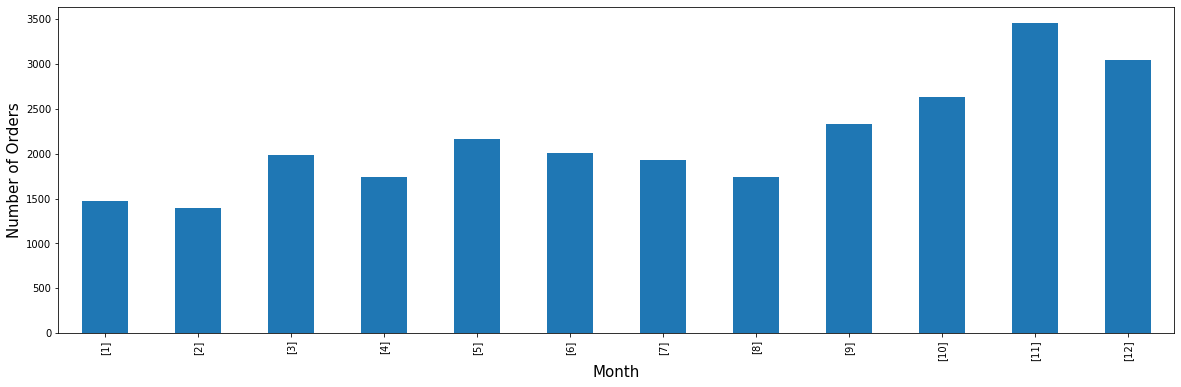

In [35]:
#10. How many orders per month? 

df_new.groupby('InvoiceNo')['Month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(20,6))
plt.xlabel('Month',rotation='horizontal',fontsize=15)
plt.ylabel('Number of Orders',fontsize=15)

Text(0, 0.5, 'Number of Orders')

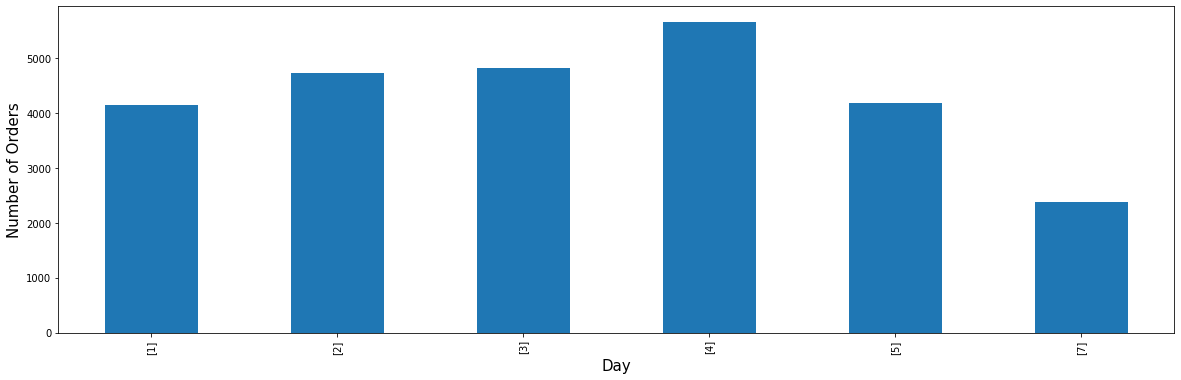

In [36]:
#11. How many orders per day? 

df_new.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar',figsize=(20,6))
plt.xlabel('Day',rotation='horizontal',fontsize=15)
#plt.set_xticklabels(('Mon','Tue','Wed','Thu','Fri','Sat','Sun'), rotation=0, fontsize="10", va="center")
plt.ylabel('Number of Orders',fontsize=15)

Text(0, 0.5, 'Number of Orders')

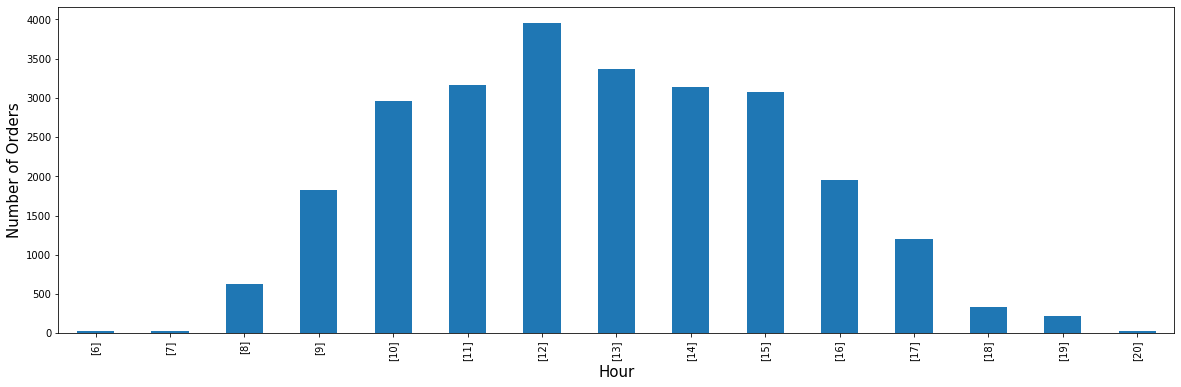

In [37]:
#12. How many orders per hour? 

df_new.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',figsize=(20,6))
plt.xlabel('Hour',rotation='horizontal',fontsize=15)
plt.ylabel('Number of Orders',fontsize=15)

Text(0, 0.5, 'country')

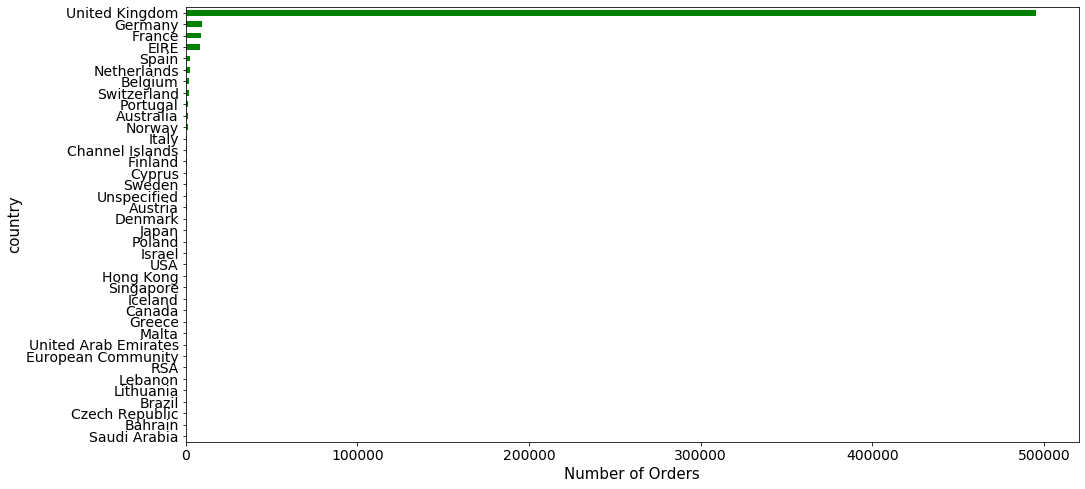

In [75]:
#13. How many orders for each country? 

plt.figure(figsize=(16,8))
orders = df_new.groupby('Country')['InvoiceNo'].count().sort_values()
orders.plot(kind='barh', fontsize=14, color='g')

plt.xlabel('Number of Orders',rotation='horizontal',fontsize=15)
plt.ylabel('country',fontsize=15)

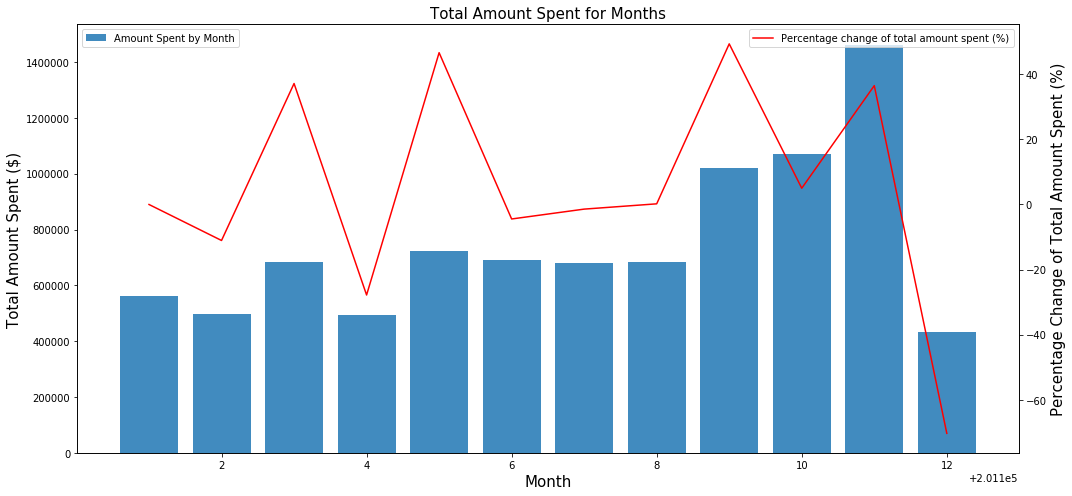

In [39]:
#14. Orders trend across months 

fig = plt.figure(figsize=(15, 7))
x1 = fig.add_subplot(111)

x1.set_xlabel('Month',fontsize=15)
x1.set_ylabel('Total Amount Spent ($)',fontsize=15)
x1.set_title('Total Amount Spent for Months',fontsize=15)

x1.bar(df_new.groupby(by=['year_month'])['Revenue'].sum().index.tolist()[1:],
        df_new.groupby(by=['year_month'])['Revenue'].sum()[1:],
        alpha=0.85,
        label='Amount Spent by Month')

x2 = x1.twinx()

x2.set_ylabel('Percentage Change of Total Amount Spent (%)',fontsize=15)

x2.plot(df_new.groupby(by=['year_month'])['Revenue'].sum().index.tolist()[1:], 
         df_new.groupby(by=['year_month'])['Revenue'].sum()[1:].pct_change().fillna(0)*100,
         label='Percentage change of total amount spent (%)',
         color='red')

x1.legend(loc='upper left')
x2.legend(loc='upper right')

fig.tight_layout()



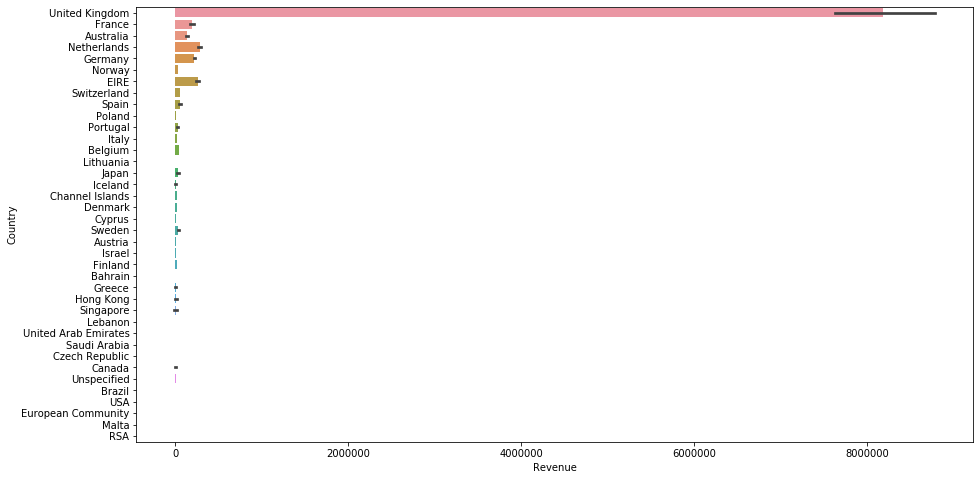

In [60]:
##15. How much money spent by each country? 
plt.subplots(figsize=(15,8))
sns.barplot(x='Revenue',y='Country',data=df_new,estimator=np.sum)